In [3]:
# importing basic libraries
import os
import textract 
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
from docx import Document
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

import re  # Import the regular expression module
from nltk.tokenize import RegexpTokenizer  # Import RegexpTokenizer from NLTK

In [4]:
# importing basic libraries

import re
import nltk
import spacy
import codecs
import requests

from textblob import TextBlob
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
# Import spaCy and load the language library
# import spacy
# nlp = spacy.load('en_core_web_sm')

In [6]:
# loading data
df = pd.read_csv('Resume.csv')

In [7]:
# backup original data
data = df.copy()

# Data Exploration

In [8]:
df.shape #Get the shape of the DataFrame

(79, 3)

In [9]:
df.head() #Display the first few rows of the DataFrame

,Filename,Text,Category
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React JS Developer
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React JS Developer
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer


In [10]:
df.tail() #Display the last few rows of the DataFrame

,Filename,Text,Category
74,Sri Krishna S_Hexaware.doc,\r\n Workday Integration Consultant\r\n\r...,Workday
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,Workday
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,Workday
77,Venkateswarlu B_Hexaware.doc,\r\nVenkateswarlu.B ...,Workday
78,Vinay Kumar_Hexaware.docx,...,Workday


In [11]:
df.sample(5) #Display a random sample of 5 rows from the DataFrame

,Filename,Text,Category
31,Peoplesoft Admin_Varkala Vikas.docx,PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obj...,Peoplesoft
26,Peoplesoft Admin_Gangareddy.doc,\r\n PeopleSoft Database ...,Peoplesoft
10,React Developer_Vinay Reddy.doc,\r\nMaryala Vinay Reddy\r\n\r\nProfessional Su...,React JS Developer
12,React Dev_Krishna Kanth_Musquare Technologies....,\nUi-Developer/ React JS Developer \nNAME: KRI...,React JS Developer
6,React Developer_PavasGoswami.doc,\r\n [pic]\r\n\r\nPROFILE\r\n\r\n Searching fo...,React JS Developer


## Quick Data Check

In [12]:
df.info() #Display information about the DataFrame, including data types and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  79 non-null     object
 1   Text      79 non-null     object
 2   Category  79 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


## Statistical Summary

In [13]:
df.describe().T #Generate descriptive statistics for numerical columns, transposed for better readability

,count,unique,top,freq
Filename,79,79,Internship_Ravali_Musquare Technologies (1).docx,1
Text,79,79,Name: Ravali P \n\n ...,1
Category,79,4,React JS Developer,24


In [14]:
df.nunique() #Count the number of unique values in each column of the DataFrame

Filename    79
Text        79
Category     4
dtype: int64

# Data Cleaning

## Identifying Duplicates
##### Check for duplicates and remove them if necessary.

In [15]:
df.duplicated().sum() #Count the number of duplicated rows in the DataFrame

0

- There are no duplicate rows present in the DataFrame.

## Identifying Missing Values

In [16]:
df.isnull().sum() #Count the number of missing values in each column of the DataFrame

Filename    0
Text        0
Category    0
dtype: int64

- There are no duplicate rows present in the DataFrame.

# Univariate Analysis
Examine the distribution of each variable individually. For numerical variables, analyze summary statistics like mean, median, min, max, and quartiles. Visualize them using histograms or boxplots. For categorical variables (Education, Marital_Status, etc.), examine the frequency distribution using bar plots.

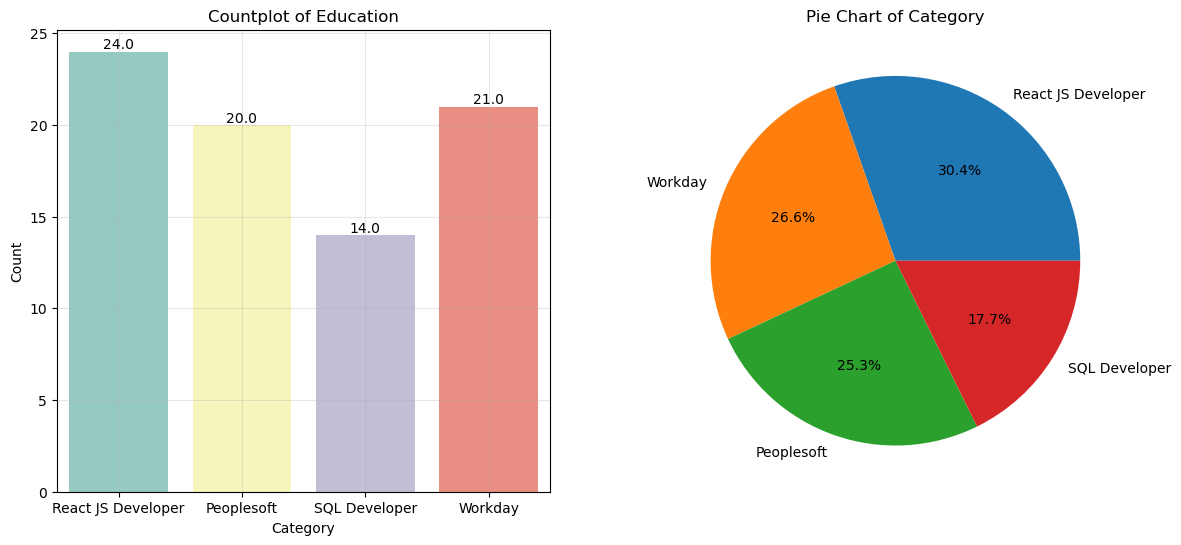

In [17]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Category", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Education')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')

# Add total count inside each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Create pie chart
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Category')
axes[1].set_ylabel('')

plt.tight_layout
plt.show()

**Insight**

In [18]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx(r'Resumes\React Developer_Haripriya.docx'))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

## Number of Words in each Resume

In [19]:
df['Word_Count'] = df['Text'].apply(lambda x: len(str(x).split(" ")))
df[['Text','Word_Count']].head()

,Text,Word_Count
0,Name: Ravali P \n\n ...,1536
1,\nSUSOVAN BAG \nSeeking a challenging ...,490
2,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,502
3,HARIPRIYA BATTINA \nExperience as UI Developer...,404
4,KAMALAKAR REDDY. A \nLinked In: https://www.li...,357


## Number of Characters

In [20]:
df['Char_Count'] = df['Text'].str.len() ## this also includes spaces
df[['Text','Char_Count']].head()

,Text,Char_Count
0,Name: Ravali P \n\n ...,3499
1,\nSUSOVAN BAG \nSeeking a challenging ...,1668
2,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,3548
3,HARIPRIYA BATTINA \nExperience as UI Developer...,2628
4,KAMALAKAR REDDY. A \nLinked In: https://www.li...,2622


## Number of Stopwords

In [21]:
stop = stopwords.words('english')
df['Stopwords'] = df['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Text','Stopwords']].head()

,Text,Stopwords
0,Name: Ravali P \n\n ...,58
1,\nSUSOVAN BAG \nSeeking a challenging ...,38
2,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,134
3,HARIPRIYA BATTINA \nExperience as UI Developer...,106
4,KAMALAKAR REDDY. A \nLinked In: https://www.li...,48


## Number of Numerics

In [22]:
df['Numerics'] = df['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Text','Numerics']].head()

,Text,Numerics
0,Name: Ravali P \n\n ...,4
1,\nSUSOVAN BAG \nSeeking a challenging ...,0
2,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,3
3,HARIPRIYA BATTINA \nExperience as UI Developer...,6
4,KAMALAKAR REDDY. A \nLinked In: https://www.li...,8


In [23]:
df

,Filename,Text,Category,Word_Count,Char_Count,Stopwords,Numerics
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React JS Developer,1536,3499,58,4
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer,490,1668,38,0
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React JS Developer,502,3548,134,3
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer,404,2628,106,6
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer,357,2622,48,8
...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,\r\n Workday Integration Consultant\r\n\r...,Workday,1671,8027,197,3
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,Workday,990,6325,191,6
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,Workday,979,7310,228,1
77,Venkateswarlu B_Hexaware.doc,\r\nVenkateswarlu.B ...,Workday,3404,9584,185,7


# Text Pre-Processing

In [24]:
df

,Filename,Text,Category,Word_Count,Char_Count,Stopwords,Numerics
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React JS Developer,1536,3499,58,4
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer,490,1668,38,0
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React JS Developer,502,3548,134,3
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer,404,2628,106,6
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer,357,2622,48,8
...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,\r\n Workday Integration Consultant\r\n\r...,Workday,1671,8027,197,3
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,Workday,990,6325,191,6
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,Workday,979,7310,228,1
77,Venkateswarlu B_Hexaware.doc,\r\nVenkateswarlu.B ...,Workday,3404,9584,185,7


In [25]:
def preprocess(sentence):
    # Convert input to a string to ensure consistency
    sentence = str(sentence)
    
    # Convert the sentence to lowercase to ensure case insensitivity
    sentence = sentence.lower()
    
    # Remove '{html}' from the sentence
    sentence = sentence.replace('{html}',"") 
    
    # Remove any HTML tags using regular expressions
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    
    # Remove URLs starting with 'http'
    rem_url = re.sub(r'http\S+', '', cleantext)
    
    # Remove any numbers from the text
    rem_num = re.sub('[0-9]+', '', rem_url)
    
    # Tokenize the text using regular expressions to extract words
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    
    # Remove stopwords (common words like 'the', 'is', 'and') from the tokens
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    
    # Join the filtered words back into a single string
    return " ".join(filtered_words)

In [26]:
df = data

In [27]:
df

,Filename,Text,Category
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React JS Developer
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React JS Developer
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer
...,...,...,...
74,Sri Krishna S_Hexaware.doc,\r\n Workday Integration Consultant\r\n\r...,Workday
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,Workday
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,Workday
77,Venkateswarlu B_Hexaware.doc,\r\nVenkateswarlu.B ...,Workday


In [28]:
df['Cleaned_Text'] = df.Text.apply(lambda x: preprocess(x))

In [29]:
df

,Filename,Text,Category,Cleaned_Text
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \n\n ...,React JS Developer,name ravali curriculum vitae specialization co...
1,Internship_Susovan Bag_Musquare Technologies.docx,\nSUSOVAN BAG \nSeeking a challenging ...,React JS Developer,susovan bag seeking challenging position field...
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React JS Developer,kanumuru deepak reddy career objective secure ...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS Developer,haripriya battina experience developer reactjs...
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS Developer,kamalakar reddy linked professional summary ye...
...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,\r\n Workday Integration Consultant\r\n\r...,Workday,workday integration consultant name sri krishn...
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,Workday,seeking suitable positions workday hcm techno ...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,Workday,workday hcm fcm name kumar role workday consul...
77,Venkateswarlu B_Hexaware.doc,\r\nVenkateswarlu.B ...,Workday,venkateswarlu workday consultant years experie...


## Removing Stop words

In [ ]:
my_stop_words = stopwords.words('english')
sw_list = ['i’m','\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in tweets.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
tweets['absolute_tweets'] = cleaned_tweets
tweets.head(10)

In [1]:
# Download stopwords corpus if not already downloaded
# nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return filtered_text

In [2]:
# Example usage:
df['Cleaned_Text'] = remove_stopwords(df['Cleaned_Text'])
df

NameError: name 'df' is not defined

## Save the Clean Data in new CSV File

In [37]:
df.drop(['Text'], axis=1, inplace=True)
df

,Filename,Category,Cleaned_Text
0,Internship_Ravali_Musquare Technologies (1).docx,React JS Developer,name ravali curriculum vitae specialization co...
1,Internship_Susovan Bag_Musquare Technologies.docx,React JS Developer,susovan bag seeking challenging position field...
2,React Developer_Deepakreddy.docx,React JS Developer,kanumuru deepak reddy career objective secure ...
3,React Developer_Haripriya.docx,React JS Developer,haripriya battina experience developer reactjs...
4,React Developer_Kamalakar Reddy.docx,React JS Developer,kamalakar reddy linked professional summary ye...
...,...,...,...
74,Sri Krishna S_Hexaware.doc,Workday,workday integration consultant name sri krishn...
75,Srikanth-Hexaware.docx,Workday,seeking suitable positions workday hcm techno ...
76,SSKumar_Hexaware.docx,Workday,workday hcm fcm name kumar role workday consul...
77,Venkateswarlu B_Hexaware.doc,Workday,venkateswarlu workday consultant years experie...


In [38]:
df.to_csv('Cleaned_Resumes.csv', index = False)

In [39]:
df = pd.read_csv('Cleaned_Resumes.csv')
df

,Filename,Category,Cleaned_Text
0,Internship_Ravali_Musquare Technologies (1).docx,React JS Developer,name ravali curriculum vitae specialization co...
1,Internship_Susovan Bag_Musquare Technologies.docx,React JS Developer,susovan bag seeking challenging position field...
2,React Developer_Deepakreddy.docx,React JS Developer,kanumuru deepak reddy career objective secure ...
3,React Developer_Haripriya.docx,React JS Developer,haripriya battina experience developer reactjs...
4,React Developer_Kamalakar Reddy.docx,React JS Developer,kamalakar reddy linked professional summary ye...
...,...,...,...
74,Sri Krishna S_Hexaware.doc,Workday,workday integration consultant name sri krishn...
75,Srikanth-Hexaware.docx,Workday,seeking suitable positions workday hcm techno ...
76,SSKumar_Hexaware.docx,Workday,workday hcm fcm name kumar role workday consul...
77,Venkateswarlu B_Hexaware.doc,Workday,venkateswarlu workday consultant years experie...


In [40]:
df.Cleaned_Text[0]

'name ravali curriculum vitae specialization computer science engg utilize technical skills achieving target developing best performance organization manual testing skills strong knowledge sdlc concepts extensive knowledge white box testing good knowledge functional testing integration testing extreme knowledge system testing good knowledge adhoc testing reliability testing good knowledge exploratory testing good knowledge stlc concepts good knowledge test cases test scenarios good knowledge globalization testing compatibility testing knowledge regression testing good knowledge test plan agile methdology good knowledge scrum methodology expertise sprint planning meeting good knowledge scrum meeting extreme knowledge sprint retrospective meeting good knowledge product backlog meeting bug triage meeting extreme knowledge normalization java skills good knowledge method overloading method overriding good understanding static nonstatic good understanding variables good knowledge constructor